In [9]:
pip install seaborn

     |████████████████████████████████| 292 kB 6.1 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [39]:
# https://plotly.com/javascript/gapminder-example/

import pandas as pd
import csv
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

In [40]:
# get data - life expectancy
life_expectancy_df = pd.read_csv('./data/Life_Expectancy_Data.csv')
life_expectancy_df

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [41]:
# get data - continents - https://www.kaggle.com/andradaolteanu/country-mapping-iso-continent-region
continents_df = pd.read_csv('./data/continents2.csv')
# continents_df
continents_df[continents_df["name"] == "United States of America" ]
# continents_df

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
235,United States of America,US,USA,840,ISO 3166-2:US,Americas,Northern America,NaN,19.0,21.0,NaN


In [42]:
# Drop all unwanted columns
continents_df.drop(columns=['alpha-2', 'alpha-3', 'country-code', 'iso_3166-2',
        'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code'], inplace=True)
continents_df

,name,region,sub-region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia
...,...,...,...
244,Wallis and Futuna,Oceania,Polynesia
245,Western Sahara,Africa,Northern Africa
246,Yemen,Asia,Western Asia
247,Zambia,Africa,Sub-Saharan Africa


In [43]:
# Rename the column to country
continents_df.rename(columns={'name': 'Country'}, inplace=True)
continents_df

,Country,region,sub-region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia
...,...,...,...
244,Wallis and Futuna,Oceania,Polynesia
245,Western Sahara,Africa,Northern Africa
246,Yemen,Asia,Western Asia
247,Zambia,Africa,Sub-Saharan Africa


In [44]:
# Merge life_expectancy and continents dataframe
life_exp_df = pd.merge(life_expectancy_df, continents_df, on=['Country'])
life_exp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2650 entries, 0 to 2649
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2650 non-null   object 
 1   Year                             2650 non-null   int64  
 2   Status                           2650 non-null   object 
 3   Life Expectancy                  2640 non-null   float64
 4   Adult Mortality                  2640 non-null   float64
 5   Infant Deaths                    2650 non-null   int64  
 6   Alcohol                          2473 non-null   float64
 7   Percentage Expenditure           2650 non-null   float64
 8   Hepatitis B                      2152 non-null   float64
 9   Measles                          2650 non-null   int64  
 10  BMI                              2616 non-null   float64
 11  under-five deaths                2650 non-null   int64  
 12  Polio               

In [51]:
life_exp_df[life_exp_df["Country"] == "Russian Federation" ]

,Country,Year,Status,Life_Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,sub-region
1959,Russian Federation,2015,Developing,75.0,222.0,13,NaN,0.000000,97.0,843,...,97.0,0.1,9329.298351,1449687.0,2.3,2.3,0.805,15.0,Europe,Eastern Europe
1960,Russian Federation,2014,Developing,73.0,225.0,13,10.12,1340.553699,97.0,4711,...,97.0,0.1,14125.961000,143819666.0,2.3,2.3,0.803,14.9,Europe,Eastern Europe
1961,Russian Federation,2013,Developing,70.0,229.0,14,10.58,1529.497771,97.0,2339,...,97.0,0.2,15543.676530,14356911.0,2.3,2.3,0.799,14.6,Europe,Eastern Europe
1962,Russian Federation,2012,Developing,69.6,237.0,14,10.99,178.822591,97.0,2123,...,97.0,0.3,15154.456870,14321676.0,2.3,2.4,0.792,14.3,Europe,Eastern Europe
1963,Russian Federation,2011,Developing,69.4,242.0,14,11.04,184.764931,97.0,629,...,97.0,0.3,14212.687000,14296868.0,2.3,2.4,0.785,14.0,Europe,Eastern Europe
1964,Russian Federation,2010,Developing,68.4,256.0,15,11.05,162.808805,97.0,129,...,97.0,0.2,1674.987710,142849449.0,2.3,2.5,0.773,13.7,Europe,Eastern Europe
1965,Russian Federation,2009,Developing,68.2,261.0,15,11.21,137.006336,98.0,101,...,98.0,0.3,8562.895980,142785342.0,2.3,2.5,0.776,14.0,Europe,Eastern Europe
1966,Russian Federation,2008,Developing,67.5,278.0,16,12.04,161.730165,98.0,27,...,98.0,0.3,11635.263700,14274235.0,2.3,2.5,0.769,13.9,Europe,Eastern Europe
1967,Russian Federation,2007,Developing,67.3,282.0,16,12.19,11.026172,98.0,173,...,98.0,0.3,911.253850,1428588.0,2.4,2.6,0.761,13.8,Europe,Eastern Europe
1968,Russian Federation,2006,Developing,66.4,3.0,17,11.79,12.251841,98.0,1147,...,98.0,0.3,692.194398,14349528.0,2.4,2.7,0.754,13.8,Europe,Eastern Europe


In [52]:
life_exp_df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'region', 'sub-region'],
      dtype='object')

In [53]:
life_exp_df.rename(columns={
    'Life Expectancy': 'Life_Expectancy'
}, inplace=True)

life_exp_df

,Country,Year,Status,Life_Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,sub-region
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia,Southern Asia
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia,Southern Asia
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia,Southern Asia
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia,Southern Asia
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia,Southern Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,Africa,Sub-Saharan Africa
2646,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,Africa,Sub-Saharan Africa
2647,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,Africa,Sub-Saharan Africa
2648,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,Africa,Sub-Saharan Africa


In [54]:
# Export to csv
life_exp_df.to_csv(path_or_buf= './data/Life.csv', sep=',', encoding='utf-8')

In [55]:
# Filter for year 2015
life_exp_2015_df = life_exp_df.loc[life_exp_df['Year'] == 2015]
life_exp_2015_df

,Country,Year,Status,Life_Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,region,sub-region
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia,Southern Asia
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,Europe,Southern Europe
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,Africa,Northern Africa
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,Africa,Sub-Saharan Africa
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,Americas,Latin America and the Caribbean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2570,Uzbekistan,2015,Developing,69.4,184.0,15,NaN,0.000000,99.0,22,...,99.0,0.1,2137.576852,312989.0,3.0,3.1,0.697,12.1,Asia,Central Asia
2586,Vanuatu,2015,Developing,72.0,13.0,0,NaN,0.000000,64.0,39,...,64.0,0.1,285.834140,26463.0,1.5,1.4,0.598,10.8,Oceania,Melanesia
2602,Yemen,2015,Developing,65.7,224.0,37,NaN,0.000000,69.0,468,...,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0,Asia,Western Asia
2618,Zambia,2015,Developing,61.8,33.0,27,NaN,0.000000,9.0,9,...,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5,Africa,Sub-Saharan Africa


In [56]:
# Group by continent
life_exp_2015_df.groupby('region').mean()

,Year,Life_Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
region,,,,,,,,,,,,,,,,,,,,
Africa,2015.0,63.087755,224.591837,34.734694,NaN,0.000000,73.632653,1309.428571,28.674468,51.387755,72.102041,NaN,73.551020,1.814286,1807.991529,1.071057e+07,6.678723,6.557447,0.532687,10.370833
Americas,2015.0,75.061290,120.129032,5.612903,NaN,0.000000,82.290323,19.709677,49.993548,6.548387,88.225806,NaN,86.612903,0.183871,8038.650347,9.544664e+06,2.500000,2.435484,0.735267,13.423333
Asia,2015.0,73.163415,134.097561,48.000000,0.900,1.738527,89.950000,4807.341463,39.926829,58.292683,86.536585,8.16,90.121951,0.126829,8793.561207,1.763948e+07,6.926829,7.356098,0.718390,12.809756
Europe,2015.0,79.335294,91.470588,0.852941,5.285,10.734566,87.148148,146.205882,55.511765,1.088235,94.000000,6.00,93.382353,0.102941,11670.127018,8.876036e+06,1.364706,1.332353,0.860412,16.223529
Oceania,2015.0,72.160000,140.000000,1.100000,8.700,0.000000,81.000000,16.100000,60.110000,1.300000,67.000000,NaN,81.300000,0.150000,9196.756007,4.179578e+06,0.950000,0.900000,0.685400,13.610000


In [57]:
# Group by continent
grouped_2015_df = life_exp_2015_df.groupby(['region', 'Country']).mean()
grouped_2015_df

Year  Life_Expectancy  Adult Mortality  \
region  Country                                                    
Africa  Algeria           2015             75.6             19.0   
        Angola            2015             52.4            335.0   
        Benin             2015             60.0            249.0   
        Botswana          2015             65.7            256.0   
        Burkina Faso      2015             59.9             26.0   
...                        ...              ...              ...   
Oceania Papua New Guinea  2015             62.9            275.0   
        Samoa             2015             74.0            125.0   
        Solomon Islands   2015             69.2            177.0   
        Tonga             2015             73.5            133.0   
        Vanuatu           2015             72.0             13.0   

                          Infant Deaths  Alcohol  Percentage Expenditure  \
region  Country                                                            
Africa  Algeria                      21      NaN                     0.0   
        Angola                       66      NaN                     0.0   
        Benin                        25      NaN                     0.0   
        Botswana                      2      NaN                     0.0   
        Burkina Faso                 38      NaN                     0.0   
...                                 ...      ...                     ...   
Oceania Papua New Guinea             10      NaN                     0.0   
        Samoa                         0      NaN                     0.0   
        Solomon Islands               0      NaN                     0.0   
        Tonga                         0      NaN                     0.0   
        Vanuatu                       0      NaN                     0.0   

                          Hepatitis B  Measles   BMI  under-five deaths  \
region  Country                                                           
Africa  Algeria                  95.0       63  59.5                 24   
        Angola                   64.0      118  23.3                 98   
        Benin                    82.0       55  25.7                 39   
        Botswana                 95.0        0  37.9                  2   
        Burkina Faso             91.0       99  19.4                 61   
...                               ...      ...   ...                ...   
Oceania Papua New Guinea         67.0       38  48.6                 12   
        Samoa                    59.0        0  74.7                  0   
        Solomon Islands          98.0        0   5.5                  0   
        Tonga                    78.0        0  75.2                  0   
        Vanuatu                  64.0       39  53.3                  0   

                          Polio  Total expenditure  Diphtheria  HIV/AIDS  \
region  Country                                                            
Africa  Algeria            95.0                NaN        95.0       0.1   
        Angola              7.0                NaN        64.0       1.9   
        Benin              78.0                NaN        82.0       1.0   
        Botswana           96.0                NaN        95.0       2.2   
        Burkina Faso       91.0                NaN        91.0       0.6   
...                         ...                ...         ...       ...   
Oceania Papua New Guinea   74.0                NaN        73.0       0.6   
        Samoa              61.0                NaN        66.0       0.1   
        Solomon Islands    99.0                NaN        98.0       0.1   
        Tonga               8.0                NaN        78.0       0.1   
        Vanuatu            65.0                NaN        64.0       0.1   

                                  GDP  Population   thinness  1-19 years  \
region  Country                                                            
Africa  Algeria           4132.7629

In [58]:
# Export to csv
life_exp_2015_df.to_csv(path_or_buf= './data/Life_2015.csv', sep=',', encoding='utf-8')

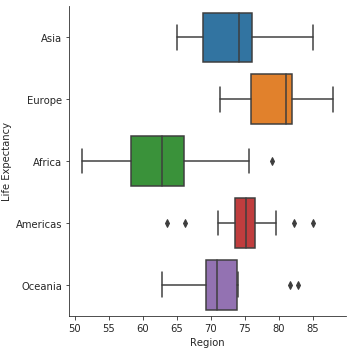

In [59]:
# Box plot using seaborn
with sns.axes_style(style='ticks'):
    g = sns.catplot(y='region', x='Life_Expectancy', data=life_exp_2015_df, kind='box', orient='h')
    g.set_axis_labels('Region', 'Life Expectancy')
    # Save the image
    plt.savefig('./static/Images/RegionBoxplot.png')